<a href="https://colab.research.google.com/github/AI4Finance-Foundation/FinRL-Meta/blob/master/Demo_China_A_share_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Quantitative trading in China A stock market with FinRL

Install FinRL

In [ ]:
!pip install git+https://github.com/AI4Finance-Foundation/FinRL.git


Install other libraries

In [ ]:
!pip install stockstats
!pip install tushare
#install talib
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz 
!tar xvzf ta-lib-0.4.0-src.tar.gz
import os
os.chdir('ta-lib') 
!./configure --prefix=/usr
!make
!make install
os.chdir('../')
!pip install TA-Lib

In [6]:
%cd /content/drive/MyDrive/HYF/Graduation_Fin
!git clone https://github.com/AI4Finance-Foundation/FinRL-Meta
%cd /content/drive/MyDrive/HYF/Graduation_Fin/FinRL-Meta/

/content/drive/MyDrive/HYF/Graduation_Fin/FinRL-Meta


### Import modules

In [9]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from IPython import display
display.set_matplotlib_formats("svg")

from finrl_meta import config
from finrl_meta.data_processors.tushare import TushareProProcessor, ReturnPlotter
from finrl_meta.env_stock_trading.env_stocktrading_China_A_shares import StockTradingEnv
from drl_agents.stablebaselines3_models import DRLAgent
pd.options.display.max_columns = None
    
print("ALL Modules have been imported!")

ImportError: ignored

### Create folders

In [ ]:
import os
if not os.path.exists("./datasets" ):
    os.makedirs("./datasets" )
if not os.path.exists("./trained_models"):
    os.makedirs("./trained_models" )
if not os.path.exists("./tensorboard_log"):
    os.makedirs("./tensorboard_log" )
if not os.path.exists("./results" ):
    os.makedirs("./results" )

### Download data, cleaning and feature engineering

In [ ]:
ticket_list=['600000.SH', '600009.SH', '600016.SH', '600028.SH', '600030.SH',
       '600031.SH', '600036.SH', '600050.SH', '600104.SH', '600196.SH',
       '600276.SH', '600309.SH', '600519.SH', '600547.SH', '600570.SH']

train_start_date='2015-01-01'
train_stop_date='2019-08-01'
val_start_date='2019-08-01'
val_stop_date='2021-01-03'

token='27080ec403c0218f96f388bca1b1d85329d563c91a43672239619ef5'

In [ ]:
# download and clean
ts_processor = TushareProProcessor(data_source="tusharepro", 
                                   start_date=train_start_date,
                                   end_date=val_stop_date,
                                   time_interval="1d",
                                   token=token)
ts_processor.download_data(ticker_list=ticket_list)

100%|██████████| 15/15 [00:27<00:00,  1.85s/it]


Shape of DataFrame:  (21574, 8)


In [ ]:
ts_processor.clean_data()
ts_processor.dataframe

Shape of DataFrame:  (21930, 8)


,tic,date,open,high,low,close,volume,day
0,600000.SH,2015-01-05,15.88,16.25,15.56,16.07,5135687.09,0.0
1,600009.SH,2015-01-05,19.82,20.91,19.82,20.53,371485.54,0.0
2,600016.SH,2015-01-05,10.87,10.96,10.50,10.78,9138873.70,0.0
3,600028.SH,2015-01-05,6.59,7.14,6.45,7.14,11864996.45,0.0
4,600030.SH,2015-01-05,33.90,35.25,33.01,34.66,6986272.15,0.0
...,...,...,...,...,...,...,...,...
21925,600276.SH,2020-12-31,112.55,112.66,110.01,111.46,281568.85,3.0
21926,600309.SH,2020-12-31,89.88,91.48,88.70,91.04,213631.34,3.0
21927,600519.SH,2020-12-31,1941.00,1998.98,1939.00,1998.00,38860.07,3.0
21928,600547.SH,2020-12-31,23.60,23.75,23.48,23.62,213786.94,3.0


In [ ]:
# add_technical_indicator
ts_processor.add_technical_indicator(config.INDICATORS)
ts_processor.clean_data()
ts_processor.dataframe

tech_indicator_list:  ['macd', 'boll_ub', 'boll_lb', 'rsi_30', 'dx_30', 'close_30_sma', 'close_60_sma']
indicator:  macd
indicator:  boll_ub
indicator:  boll_lb
indicator:  rsi_30
indicator:  dx_30
indicator:  close_30_sma
indicator:  close_60_sma
Succesfully add technical indicators
Shape of DataFrame:  (21885, 16)


,tic,date,index,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,dx_30,close_30_sma,close_60_sma
0,600000.SH,2015-01-08,45,15.87,15.88,15.20,15.25,3306271.72,3.0,-0.032571,16.617911,15.012089,6.058641,23.014040,15.815000,15.815000
1,600009.SH,2015-01-08,46,20.18,20.18,19.73,20.00,198117.45,3.0,-0.016008,20.663897,19.736103,12.828915,100.000000,20.200000,20.200000
2,600016.SH,2015-01-08,47,10.61,10.66,10.09,10.20,4851684.17,3.0,-0.018247,10.957604,9.997396,11.862558,100.000000,10.477500,10.477500
3,600028.SH,2015-01-08,48,7.09,7.41,6.83,6.85,8190902.35,3.0,-0.008227,7.342000,6.743000,27.409248,64.934862,7.042500,7.042500
4,600030.SH,2015-01-08,49,36.40,36.70,34.68,35.25,6376268.69,3.0,0.032910,36.576444,33.808556,61.517448,100.000000,35.192500,35.192500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21880,600276.SH,2020-12-31,21925,112.55,112.66,110.01,111.46,281568.85,3.0,5.999563,120.049291,81.980709,65.497668,49.657169,96.356667,92.992167
21881,600309.SH,2020-12-31,21926,89.88,91.48,88.70,91.04,213631.34,3.0,1.723646,92.780907,79.425093,58.501768,38.129756,85.693000,84.104667
21882,600519.SH,2020-12-31,21927,1941.00,1998.98,1939.00,1998.00,38860.07,3.0,42.535547,1942.989267,1761.052733,66.422960,52.684229,1815.039333,1761.921500
21883,600547.SH,2020-12-31,21928,23.60,23.75,23.48,23.62,213786.94,3.0,-0.252554,24.495355,23.032645,42.060734,0.003164,23.883667,24.534000


### Split traning dataset

In [ ]:
train =ts_processor.data_split(ts_processor.dataframe, train_start_date, train_stop_date)       
len(train.tic.unique())

15

In [ ]:
train.tic.unique()

array(['600000.SH', '600009.SH', '600016.SH', '600028.SH', '600030.SH',
       '600031.SH', '600036.SH', '600050.SH', '600104.SH', '600196.SH',
       '600276.SH', '600309.SH', '600519.SH', '600547.SH', '600570.SH'],
      dtype=object)

In [ ]:
train.head()

,tic,date,index,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,dx_30,close_30_sma,close_60_sma
0,600000.SH,2015-01-08,45,15.87,15.88,15.20,15.25,3306271.72,3.0,-0.032571,16.617911,15.012089,6.058641,23.014040,15.8150,15.8150
0,600009.SH,2015-01-08,46,20.18,20.18,19.73,20.00,198117.45,3.0,-0.016008,20.663897,19.736103,12.828915,100.000000,20.2000,20.2000
0,600016.SH,2015-01-08,47,10.61,10.66,10.09,10.20,4851684.17,3.0,-0.018247,10.957604,9.997396,11.862558,100.000000,10.4775,10.4775
0,600028.SH,2015-01-08,48,7.09,7.41,6.83,6.85,8190902.35,3.0,-0.008227,7.342000,6.743000,27.409248,64.934862,7.0425,7.0425
0,600030.SH,2015-01-08,49,36.40,36.70,34.68,35.25,6376268.69,3.0,0.032910,36.576444,33.808556,61.517448,100.000000,35.1925,35.1925


In [ ]:
train.shape

(16695, 16)

In [ ]:
stock_dimension = len(train.tic.unique())
state_space = stock_dimension*(len(config.INDICATORS)+2)+1
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 15, State Space: 136


### Train

In [ ]:
env_kwargs = {
    "stock_dim": stock_dimension,
    "hmax": 1000, 
    "initial_amount": 1000000, 
    "buy_cost_pct":6.87e-5,
    "sell_cost_pct":1.0687e-3,
    "reward_scaling": 1e-4,
    "state_space": state_space, 
    "action_space": stock_dimension,
    "tech_indicator_list": config.INDICATORS, 
    "print_verbosity": 1,
    "initial_buy":True,
    "hundred_each_trade":True
}

e_train_gym = StockTradingEnv(df = train, **env_kwargs)

## DDPG

In [ ]:
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))

<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


In [ ]:
agent = DRLAgent(env = env_train)
DDPG_PARAMS = {
                "batch_size": 256, 
               "buffer_size": 50000, 
               "learning_rate": 0.0005,
               "action_noise":"normal",
                }
POLICY_KWARGS = dict(net_arch=dict(pi=[64, 64], qf=[400, 300]))
model_ddpg = agent.get_model("ddpg", model_kwargs = DDPG_PARAMS, policy_kwargs=POLICY_KWARGS)

{'batch_size': 256, 'buffer_size': 50000, 'learning_rate': 0.0005, 'action_noise': NormalActionNoise(mu=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], sigma=[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1])}
Using cpu device


In [ ]:
trained_ddpg = agent.train_model(model=model_ddpg, 
                              tb_log_name='ddpg',
                              total_timesteps=10000)


## A2C

In [ ]:
agent = DRLAgent(env = env_train)
model_a2c = agent.get_model("a2c")

{'n_steps': 5, 'ent_coef': 0.01, 'learning_rate': 0.0007}
Using cpu device


In [ ]:
trained_a2c = agent.train_model(model=model_a2c, 
                             tb_log_name='a2c',
                             total_timesteps=50000)

### Trade

In [ ]:
trade = ts_processor.data_split(ts_processor.dataframe, val_start_date, val_stop_date)
env_kwargs = {
    "stock_dim": stock_dimension,
    "hmax": 1000, 
    "initial_amount": 1000000, 
    "buy_cost_pct":6.87e-5,
    "sell_cost_pct":1.0687e-3,
    "reward_scaling": 1e-4,
    "state_space": state_space, 
    "action_space": stock_dimension,
    "tech_indicator_list": config.INDICATORS, 
    "print_verbosity": 1,
    "initial_buy":False,
    "hundred_each_trade":True
}
e_trade_gym = StockTradingEnv(df = trade, **env_kwargs)

In [ ]:
df_account_value, df_actions = DRLAgent.DRL_prediction(model=trained_ddpg,
                       environment = e_trade_gym)

Episode: 5
day: 345, episode: 5
begin_total_asset: 1000000.00
end_total_asset: 1573199.95
total_reward: 573199.95
total_cost: 2199.05
total_trades: 3397
Sharpe: 1.516
hit end!


In [ ]:
df_actions.to_csv("action.csv",index=False)
df_actions

,600000.SH,600009.SH,600016.SH,600028.SH,600030.SH,600031.SH,600036.SH,600050.SH,600104.SH,600196.SH,600276.SH,600309.SH,600519.SH,600547.SH,600570.SH
date,,,,,,,,,,,,,,,
2019-08-01,400,0,0,1000,0,0,0,1000,1000,0,0,0,1000,0,0
2019-08-02,0,0,0,-900,0,0,0,100,0,0,0,0,0,100,0
2019-08-05,1000,1000,1000,-100,1000,1000,0,1000,1000,0,0,0,-1000,1000,0
2019-08-06,600,300,-1000,1000,-1000,-1000,0,1000,1000,0,0,0,800,-1000,0
2019-08-07,1000,1000,1000,1000,900,1000,0,1000,1000,0,0,0,-800,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-12-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-12-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Backtest

In [ ]:
# %matplotlib inline
plotter = ReturnPlotter(df_account_value, trade, val_start_date, val_stop_date)
# plotter.plot_all()

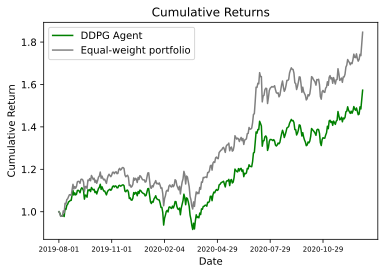

In [ ]:
%matplotlib inline
plotter.plot()

In [ ]:
# %matplotlib inline
# # ticket: SSE 50：000016
# plotter.plot("000016")

#### Use pyfolio

In [ ]:
# CSI 300
baseline_df = plotter.get_baseline("399300")

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


In [ ]:
import pyfolio
from pyfolio import timeseries
daily_return = plotter.get_return(df_account_value)
daily_return_base = plotter.get_return(baseline_df, value_col_name="close")

perf_func = timeseries.perf_stats
perf_stats_all = perf_func(returns=daily_return, 
                              factor_returns=daily_return_base, 
                                positions=None, transactions=None, turnover_denom="AGB")
print("==============DRL Strategy Stats===========")
perf_stats_all

==============DRL Strategy Stats===========


Annual return          0.390985
Cumulative returns     0.573200
Annual volatility      0.237005
Sharpe ratio           1.515891
Calmar ratio           2.071571
Stability              0.700151
Max drawdown          -0.188738
Omega ratio            1.296171
Sortino ratio          2.247992
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.212169
Daily value at risk   -0.028434
Alpha                  0.091054
Beta                   0.886129
dtype: float64

In [ ]:
import pyfolio
from pyfolio import timeseries
daily_return = plotter.get_return(df_account_value)
daily_return_base = plotter.get_return(baseline_df, value_col_name="close")

perf_func = timeseries.perf_stats
perf_stats_all = perf_func(returns=daily_return_base, 
                              factor_returns=daily_return_base, 
                                positions=None, transactions=None, turnover_denom="AGB")
print("==============Baseline Strategy Stats===========")
perf_stats_all

==============Baseline Strategy Stats===========


Annual return          0.273954
Cumulative returns     0.370462
Annual volatility      0.205151
Sharpe ratio           1.287387
Calmar ratio           1.703751
Stability              0.704704
Max drawdown          -0.160795
Omega ratio            1.261432
Sortino ratio          1.807098
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.264827
Daily value at risk   -0.024799
Alpha                  0.000000
Beta                   1.000000
dtype: float64

In [ ]:
# with pyfolio.plotting.plotting_context(font_scale=1.1):
#         pyfolio.create_full_tear_sheet(returns = daily_return,
#                                        benchmark_rets = daily_return_base, set_context=False)

### Authors
github username: oliverwang15, eitin-infant